In [7]:
import predictthumb, perfect, pooled, predictthumbGP, averageoffset
reload(predictthumb)
reload(perfect)
reload(pooled)
reload(predictthumbGP)
reload(averageoffset)

noregr = []
pool = []
perf = []
pred = []
predGP = []
averGP = []

for i in range(3,18):
    print ("Processing user %d" %i)
    
    before, after = predictthumb.run(i)
    pred.append(after[1])
    
    before, after = pooled.run(i)
    pool.append(after[1])
    
    before, after = predictthumbGP.run(i)
    predGP.append(after[1])
    
    before, after = perfect.run(i)
    perf.append(after[1])
    noregr.append(before[1])
    
    before, after = averageoffset.run(i)
    averGP.append(after[1])

print "###################"    
print "Processing Complete"    

Processing user 3
Processing user 4
Processing user 5
Processing user 6
Processing user 7
Processing user 8
Processing user 9
Processing user 10
Processing user 11
Processing user 12
Processing user 13
Processing user 14
Processing user 15
Processing user 16
Processing user 17
###################
Processing Complete


##Touches within 2mm virtual button##

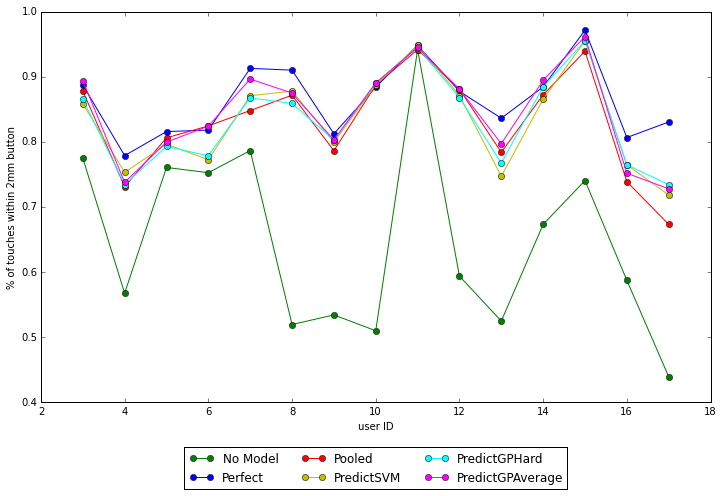

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7))

plt.errorbar(range(3,18), noregr, marker='o', color ='g', label='No Model')
plt.errorbar(range(3,18), perf, marker='o', color = 'b', label='Perfect')
plt.errorbar(range(3,18), pool, marker='o', color='r', label='Pooled')
plt.errorbar(range(3,18), pred, marker='o', color = 'y', label='PredictSVM')
plt.errorbar(range(3,18), predGP, marker='o', color='cyan', label='PredictGPHard')
plt.errorbar(range(3,18), averGP, marker='o', color='magenta', label='PredictGPAverage')

plt.legend(loc='best')
plt.xlabel('user ID')
plt.ylabel('% of touches within 2mm button')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()

##Only thumb prediction models##

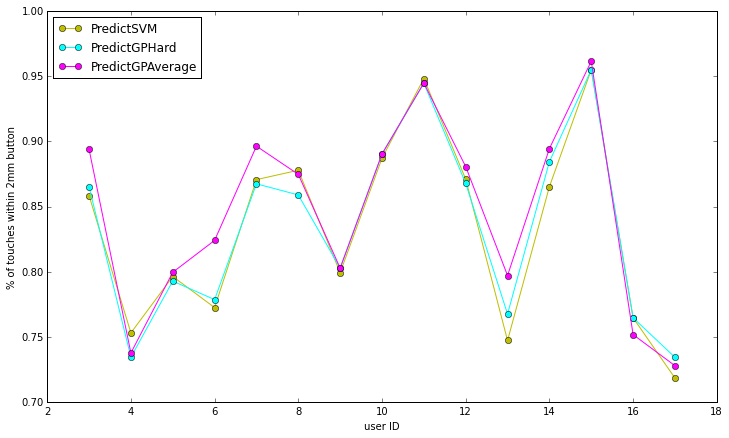

In [9]:
fig = plt.figure(figsize=(12, 7))

plt.errorbar(range(3,18), pred, marker='o', color = 'y', label='PredictSVM')
plt.errorbar(range(3,18), predGP, marker='o', color='cyan', label='PredictGPHard')
plt.errorbar(range(3,18), averGP, marker='o', color='magenta', label='PredictGPAverage')

plt.legend(loc='best')
plt.xlabel('user ID')
plt.ylabel('% of touches within 2mm button')
plt.show()